In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [70]:
df=pd.read_csv('Iris.csv')

In [71]:
print(df.head())  # View top records

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [72]:
# check for null values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


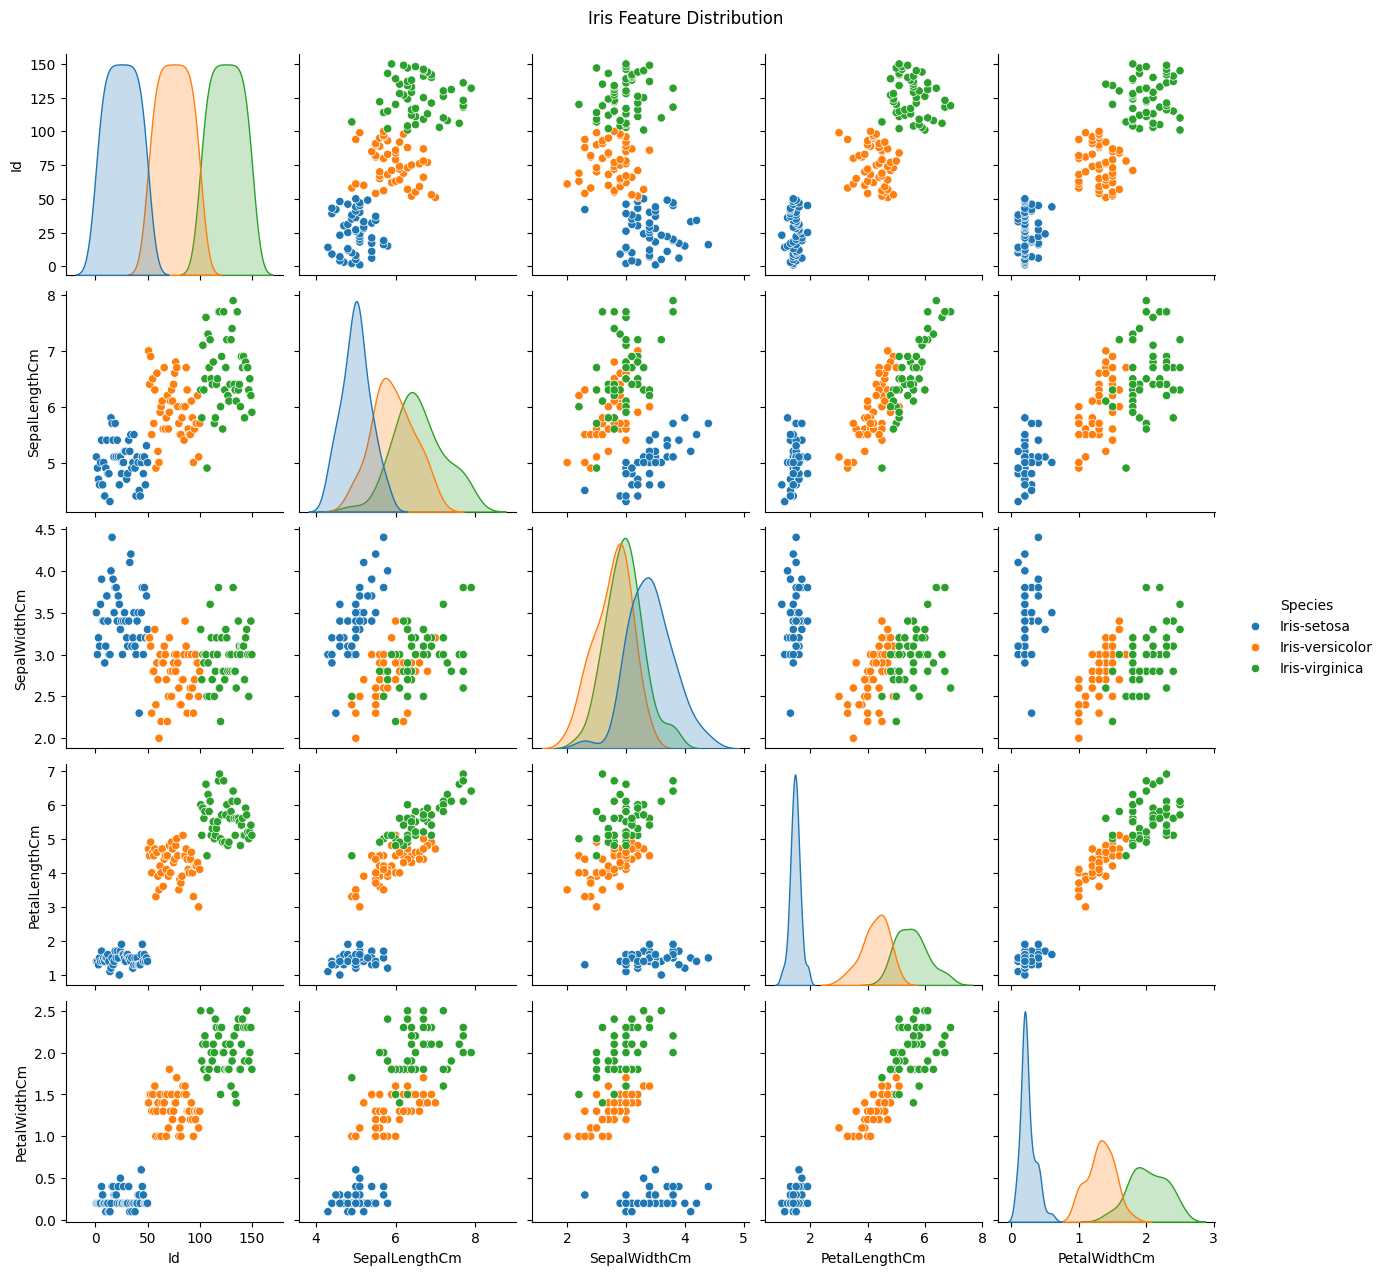

In [73]:
# Step 1: Visualize the dataset
# Pairplot by species
sns.pairplot(df, hue='Species')
plt.suptitle("Iris Feature Distribution", y=1.02)
plt.show()

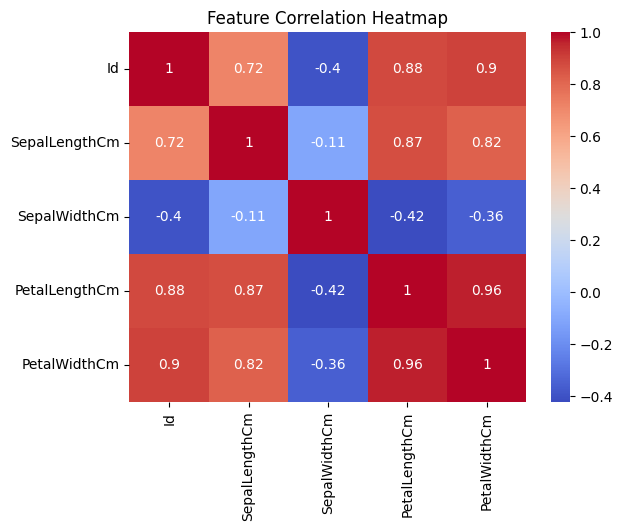

In [74]:
# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [75]:
# Step 2: Prepare the data for model training
X = df.drop('Species', axis=1)   # Feature columns means the c contain all remaining four column except species
y = df['Species']                 # Target column

In [76]:
print(X) #it is clear that the X contain these four column

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]


In [77]:
print(y) # similarly to x the y only have the tartgeted column species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [78]:
# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ X_train shape:", X_train.shape)
print("✅ y_train shape:", y_train.shape)
print("✅ X_test shape:", X_test.shape)
print("✅ y_test shape:", y_test.shape)

"""
Variable                  Meaning

X_train	              80% of the input features used to train the model    (4 column)
X_test	              20% of the input features used to test the model
y_train              	80% of the target labels (species) for training    (species)
y_test	              20% of the target labels (species) for testing

"""

✅ X_train shape: (120, 5)
✅ y_train shape: (120,)
✅ X_test shape: (30, 5)
✅ y_test shape: (30,)


'\nVariable                  Meaning\n\t              \nX_train\t              80% of the input features used to train the model    (4 column)\nX_test\t              20% of the input features used to test the model\ny_train              \t80% of the target labels (species) for training    (species)\ny_test\t              20% of the target labels (species) for testing\n\n'

In [79]:
# Step 3: Standardize the feature values
scaler = StandardScaler()# Create a scaler object
X_train = scaler.fit_transform(X_train)# Fit on training data and scale it(calculate mean and standard devition to fit)
X_test = scaler.transform(X_test) # Only scale test data (don’t fit again!, apply same scaling here)

In [80]:
# Step 4: Train a classification model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [81]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

print(" Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy Score: 1.0

 Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

